In [1]:
import json
import os
import pandas as pd
from IPython.display import Image
import altair as alt

In [2]:
project_path = '/Users/rdyo/code/FoodSnap/'

# Helper functions

In [3]:
colors_dict = {
    "Blue": "#00B7F1",
    "Dark Blue": "#000E4E",
    "Green": "#81BB41",
    "Purple": "#993399",
    "Orange": "#E75424",
    "Medium Light Gray": "#E6E7E8",
    "Light Gray": "#F1F1F2",
    "Dark Gray": "#BEC1C3",
    "White": "#FFFFFF",
    "Black": "#000000",
    "Magenta": "#f653a6",
    "Beigegrau": "#756f61",
    "Blue 2": "#0089b5",
    "Pink": "#c460aa",
    "Dark Green": "#263813",
}

def constantia():
    """
    Configure font and font sizes
    """
    font = "Constantia"

    return {
        "config": {
            "title": {"font": font, "fontSize": 22},
            "axis": {
                "labelFont": font,
                "titleFont": font,
                "labelFontSize": 20,
                "titleFontSize": 26,
            },
            "header": {
                "labelFont": font,
                "titleFont": font,
                "labelFontSize": 20,
                "titleFontSize": 26,
            },
            "legend": {
                "labelFont": font,
                "titleFont": font,
                "labelFontSize": 20,
                "titleFontSize": 26,
            },
            "view": {
                "height": 300,
                "width": 600,
            },
        }
    }


def def_style():
    """
    Define font and some other altair settings
    """

    alt.renderers.enable("default")
    alt.data_transformers.disable_max_rows()
    alt.themes.register("constantia", constantia)
    alt.themes.enable("constantia")
    # print("BY Style applied")

In [4]:
def plot_simple_cat_hist(df, xvar, xlabel, yvar, ylabel):
    """
    Histogram with aggregation per categories
    Parameters:
        df (DataFrame): input dataframe
        xvar (str): name of column with counts
        xlabel (str): title for x-axis
        yvar (str): name of column with categories
        ylabel (str): title for y-axis
    Return:
        altair chart
    """

    def_style()
    chart = (
        alt.Chart(df)
        .mark_bar(color=colors_dict["Blue"], opacity=0.99)
        .encode(
            y=alt.Y(f"{yvar}:O", title=ylabel, sort=alt.EncodingSortField(field=xvar, order="descending")),
            x=alt.X(f"{xvar}:Q", title=xlabel),
            tooltip=[xvar, yvar],
        )
        .interactive()
        .configure_axis(grid=False)
        .configure_view(stroke="transparent")
    )
    return chart


def plot_simple_cat_unordered_hist(df, xvar, xlabel, yvar, ylabel):
    """
    Histogram with aggregation per categories
    Parameters:
        df (DataFrame): input dataframe
        xvar (str): name of column with categories
        xlabel (str): title for x-axis
        yvar (str): name of column with counts
        ylabel (str): title for y-axis
    Return:
        altair chart
    """

    stl.def_style()
    chart = (
        alt.Chart(df)
        .mark_bar(color=colors_dict["Blue"], opacity=0.99)
        .encode(
            x=alt.X(f"{xvar}:O", title=xlabel),
            y=alt.Y(f"{yvar}:Q", title=ylabel),
            tooltip=[f"{yvar}"],
        )
        .interactive()
        .configure_axis(grid=False)
        .configure_view(stroke="transparent")
    )
    return chart


def plot_simple_binned_unordered_hist(
    df, xvar, xlabel, yvar, ylabel, binning=alt.Bin(extent=[0, 6], step=0.2), yscalelog=False
):
    """
    Histogram with aggregation per categories
    Parameters:
        df (DataFrame): input dataframe
        xvar (str): name of column with categories
        xlabel (str): title for x-axis
        yvar (str): name of column with counts
        ylabel (str): title for y-axis
        yscalelog (bool): plot y-axis in log scale
    Return:
        altair chart
    """
    yscale = "log" if yscalelog else "linear"
    stl.def_style()
    chart = (
        alt.Chart(df)
        .mark_bar(color=colors_dict["Blue"], opacity=0.99)
        .encode(
            x=alt.X(f"{xvar}:Q", title=xlabel, bin=binning),
            y=alt.Y(f"{yvar}:Q", title=ylabel, scale=alt.Scale(type=yscale)),
            tooltip=[xvar, yvar],
        )
        .configure_axis(grid=False)
        .configure_view(stroke="transparent")
    )
    return chart


def agg_categories(df, agg="nunique", category="CATEGORY", objects="ProductID"):
    """
    Aggregate per category
    """
    df_categories = df.groupby([category]).agg({objects: agg}).reset_index()
    return df_categories


def plot_category_counts(
    df, category="CATEGORY", category_label="category", objects="ProductID", object_label="ProductID count"
):
    """
    Count of distinct objects per category and show top-10 on the plot
    Parameters:
        df (DataFrame): input dataframe
        category (str): column with categories
        category_label (str): title for x-axis
        object(str): column to count distinct objects in the category
        object_label(str): title for y-axis
    Return:
        altair chart
    """

    df_categories = agg_categories(df, agg="nunique", category=category, objects=objects)
    df_categories = df_categories.sort_values(by=objects, ascending=False).head(15)
    chart = plot_simple_cat_hist(
        df_categories,
        objects,
        object_label,
        category,
        category_label,
    )
    return chart

# Read input data

## Read annotation data

In [5]:
#ann_file = project_path+"data/3.0/annotations.json"
ann_file = project_path+"data/3.0/fixed_annotations.json"
annotations = json.load(open(ann_file, 'r'))

In [6]:
annotations.keys()

dict_keys(['info', 'images', 'annotations', 'categories'])

In [7]:
df_images_prop = pd.json_normalize(annotations, record_path =['images'])
df_images_prop.rename(columns={'id':'image_id'},inplace=True)

In [8]:
df_images = pd.json_normalize(annotations, record_path =['annotations'])

In [9]:
df_images = df_images.merge(df_images_prop,on='image_id',how='left')

In [10]:
df_categories = pd.json_normalize(annotations, record_path =['categories'])
df_categories.rename(columns={'id':'category_id','name':'category_name','name_readable':'category_name_readable'},inplace=True)

In [11]:
df_img_annot = df_images[['id','image_id','file_name','width','height','category_id','area']].merge(df_categories,on=['category_id'],how='left')

# Preprocessing

In [12]:
df_img_annot['picture_size'] = df_img_annot['width']*df_img_annot['height']

In [13]:
df_img_annot['category_name_clean'] = df_img_annot['category_name'].str.replace('-','_')
df_img_annot['category_name'].nunique(),df_img_annot['category_name_clean'].nunique()

(439, 439)

# Remove duplicates

In [14]:
df_img_annot.shape

(631316, 12)

In [15]:
df_img_annot.drop_duplicates(subset=['image_id','category_id','category_name_clean'],inplace=True)

In [16]:
df_img_annot.shape

(103856, 12)

In [17]:
180194 - 117210

62984

In [18]:
df_img_annot.sample(5)

id  image_id   file_name  width  height  category_id     area  \
292480  138093     95352  095352.jpg    392     391          204  38249.0   
217398  319806    183412  183412.jpg   1024    1024          263  74311.0   
78742   243926    152127  152127.jpg    772     772          409  93292.0   
174766   75205     41970  041970.jpg    480     480          290  61335.0   
100643  253605    157382  157382.jpg    401     400           60  46721.0   

       category_name category_name_readable supercategory  picture_size  \
292480   hard_cheese            hard_cheese          food        153272   
217398    muesli_dry             muesli_dry          food       1048576   
78742   tomato_sauce           tomato_sauce          food        595984   
174766         peach                  peach          food        230400   
100643   bread_white            bread_white          food        160400   

       category_name_clean  
292480         hard_cheese  
217398          muesli_dry  
78742         tomato_sauce  
174766               peach  
100643         bread_white

# Stat summary

In [19]:
df_img_annot['image_id'].nunique()

55266

In [20]:
df_img_annot['category_id'].nunique()

439

In [21]:
df_img_annot[df_img_annot['picture_size']==df_img_annot['picture_size'].min()]

id  image_id   file_name  width  height  category_id     area  \
25618  7099     10056  010056.jpg    182     183          302  15374.0   

      category_name category_name_readable supercategory  picture_size  \
25618     pistachio              pistachio          food         33306   

      category_name_clean  
25618           pistachio

In [22]:
df_img_annot['picture_size'].value_counts()

picture_size
160400     11333
215296     10555
230400     10202
153272      7584
1048576     4202
           ...  
124609         1
259081         1
294912         1
334084         1
454144         1
Name: count, Length: 524, dtype: int64

In [23]:
df_img_annot[df_img_annot['picture_size']==df_img_annot['picture_size'].max()]

id  image_id   file_name  width  height  category_id       area  \
204658  83458     49396  049396.jpg   3456    4608           80  4100770.0   
223995  89117     53873  053873.jpg   3456    4608           26  4336252.0   
224003  89118     53873  053873.jpg   3456    4608          260  2013491.0   
224007  88168     53875  053875.jpg   3456    4608          330  7390720.0   
224009  89120     53875  053875.jpg   3456    4608          260  2316658.0   
224011  89121     53875  053875.jpg   3456    4608           95   192604.0   
224028  89122     53879  053879.jpg   3456    4608          103  1794251.0   
227080  91739     56091  056091.jpg   3456    4608           80  1639407.0   
519427  89116     53873  053873.jpg   3456    4608           78  2973446.0   
519438  89119     53873  053873.jpg   3456    4608          354  4113867.0   
519465  89123     53879  053879.jpg   3456    4608          221  4724593.0   

                  category_name   category_name_readable supercategory  \
204658               cappuccino               cappuccino          food   
223995                     beef                     beef          food   
224003         mixed_vegetables         mixed_vegetables          food   
224007  rice_noodles_vermicelli  rice_noodles_vermicelli          food   
224009         mixed_vegetables         mixed_vegetables          food   
224011           chicken_breast           chicken_breast          food   
224028       chips_french_fries       chips_french_fries          food   
227080               cappuccino               cappuccino          food   
519427     cantonese_fried_rice     cantonese_fried_rice          food   
519438         sauce_sweet_sour         sauce_sweet_sour          food   
519465      kebab_in_pita_bread      kebab_in_pita_bread          food   

        picture_size      category_name_clean  
204658      15925248               cappuccino  
223995      15925248                     beef  
224003      15925248         mixed_vegetables  
224007      15925248  rice_noodles_vermicelli  
224009      15925248         mixed_vegetables  
224011      15925248           chicken_breast  
224028      15925248       chips_french_fries  
227080      15925248               cappuccino  
519427      15925248     cantonese_fried_rice  
519438      15925248         sauce_sweet_sour  
519465      15925248      kebab_in_pita_bread

# Show image 

pasta_hornli


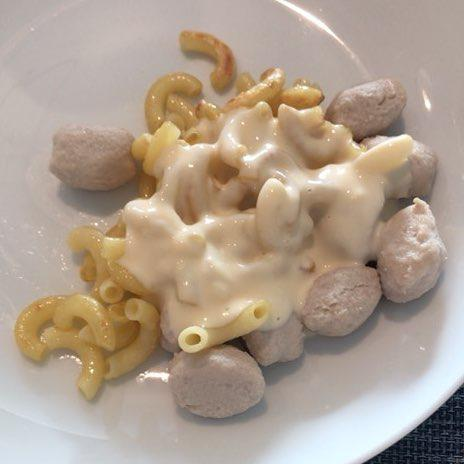

In [24]:
index = 140
img_path = project_path+"data/3.0/images/"
img_file = img_path+df_img_annot['file_name'][index]
print(df_img_annot['category_name_readable'][index])
Image(filename=img_file) 

# Analysis

## Categories distribution

In [25]:
plot_category_counts(df_img_annot,category='supercategory',category_label='SuperCategory',objects='image_id',object_label='ImageID count')

alt.Chart(...)

In [26]:
plot_category_counts(df_img_annot,category='category_name_clean',category_label='Category',objects='image_id',object_label='ImageID count')

alt.Chart(...)

In [27]:
df_img_annot['category_name_clean'].value_counts()

category_name_clean
water                                                        4521
bread_white                                                  4110
bread_whole_wheat                                            3032
coffee                                                       2827
salad_leaf_salad_green                                       2807
                                                             ... 
gummi_bears_fruit_jellies_jelly_babies_with_fruit_essence      18
bagel_without_filling                                          17
oat_milk                                                       17
buckwheat_pancake                                              17
oil                                                            13
Name: count, Length: 439, dtype: int64

In [28]:
# df_img_annot_catagg = df_img_annot.groupby(['category_id']).agg({'image_id':'nunique','category_name_readable':'unique','category_name_clean':'nunique'}).reset_index()
# df_img_annot_catagg[df_img_annot_catagg['category_name_clean']>1]

In [29]:
df_img_annot_catagg = df_img_annot.groupby(['category_name_clean']).agg({'image_id':'nunique','category_name_readable':'unique','category_id':'nunique'}).reset_index()
df_img_annot_catagg['category_size'] = 'M'
df_img_annot_catagg.loc[df_img_annot_catagg['image_id']<20,'category_size'] = 'S'
df_img_annot_catagg.loc[df_img_annot_catagg['image_id']>500,'category_size'] = 'L'
df_img_annot_catagg.loc[df_img_annot_catagg['image_id']>1000,'category_size'] = 'XL'
plot_category_counts(df_img_annot_catagg,category='category_size',category_label='Category Size',objects='category_name_clean',object_label='Categories count')

alt.Chart(...)

In [30]:
df_img_annot_catagg

category_name_clean  image_id category_name_readable  category_id  \
0               almonds       369              [almonds]            1   
1             anchovies        33            [anchovies]            1   
2         aperol_spritz        54        [aperol_spritz]            1   
3                 apple      1269                [apple]            1   
4             apple_pie       184            [apple_pie]            1   
..                  ...       ...                    ...          ...   
434          wine_white       537           [wine_white]            1   
435     witloof_chicory       180      [witloof_chicory]            1   
436             yogourt       371              [yogourt]            1   
437              yogurt       513               [yogurt]            1   
438            zucchini       605             [zucchini]            1   

    category_size  
0               M  
1               M  
2               M  
3              XL  
4               M  
..            ...  
434             L  
435             M  
436             M  
437             L  
438             L  

[439 rows x 5 columns]

## Number of categories per Image

In [31]:
df_img_annot.columns

Index(['id', 'image_id', 'file_name', 'width', 'height', 'category_id', 'area',
       'category_name', 'category_name_readable', 'supercategory',
       'picture_size', 'category_name_clean'],
      dtype='object')

In [32]:
df_img_annot_agg = df_img_annot.groupby(['image_id']).agg({'category_id':'nunique'}).reset_index()

In [33]:
df_img_annot_agg['category_id'].min(),df_img_annot_agg['category_id'].max(),df_img_annot_agg['category_id'].mean()

(1, 15, 1.8792024029240402)

In [34]:
df_img_annot_agg['category_id'].median()

1.0

In [43]:
alt.Chart(df_img_annot_agg).mark_bar(color=colors_dict["Blue"], opacity=0.99).encode(
    alt.X("category_id:Q", bin=alt.Bin(extent=[0, 15], step=1),title="number of categories per image"),
    y='count()',
).configure_axis(grid=False).configure_view(stroke="transparent")

alt.Chart(...)

# Image categories

In [36]:
df_img_annot['img_size_type_width'] = 'M'
df_img_annot.loc[df_img_annot['width']<250,'img_size_type_width'] = 'S'
df_img_annot.loc[df_img_annot['width']>600,'img_size_type_width'] = 'L'
df_img_annot.loc[df_img_annot['width']>1200,'img_size_type_width'] = 'XL'

In [37]:
plot_category_counts(df_img_annot,category='img_size_type_width',category_label='Image width',objects='image_id',object_label='ImageID count')

alt.Chart(...)

In [38]:
df_img_annot['img_size_type_height'] = 'M'
df_img_annot.loc[df_img_annot['height']<250,'img_size_type_height'] = 'S'
df_img_annot.loc[df_img_annot['height']>600,'img_size_type_height'] = 'L'
df_img_annot.loc[df_img_annot['height']>1200,'img_size_type_height'] = 'XL'

In [39]:
plot_category_counts(df_img_annot,category='img_size_type_height',category_label='Image height',objects='image_id',object_label='ImageID count')

alt.Chart(...)

# Mixed categories

In [40]:
mask = df_img_annot['category_name_clean'].str.contains('_n_s')
mask2 = df_img_annot['category_name_clean'].isin(df_img_annot[mask]['category_name_clean'].unique())
df_img_annot[mask2]['image_id'].nunique()

0

In [41]:
plot_category_counts(df_img_annot[mask2],category='category_name_clean',category_label='Mixed categories',objects='image_id',object_label='ImageID count')

/Users/rdyo/code/FoodSnap/project_env/lib/python3.11/site-packages/altair/utils/core.py:230: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  warnings.warn(


alt.Chart(...)